In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [2]:
# 重回帰分析　広域予備率あり
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
len(files)

20

In [3]:
# 重回帰分析 正則あり
# それぞれの分布は最大値がさだめられていないため、標準化
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

target =['太陽光絶対値誤差合算(実績-想定)(kWh)',
        'spot_volume(kWh)', '低下量合計','intra_volume（MWh/h）']
df_select =df_king[['gap_price[intra-spot](円/kWh)']+target]
df = df_select.dropna()
df['intra_volume（MWh/h）']=df['intra_volume（MWh/h）']*1000/2 

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df))
df_std = scaler.transform(np.array(df))
df_std = pd.DataFrame(df_std,columns=df.columns)

# 目的変数(Y)
Y = np.array(df_std['gap_price[intra-spot](円/kWh)'])

# 説明変数(X)
# col_name = ['風力誤差合算(実績-想定)(kWh)(ならし)', '太陽光誤差合算(実績-想定)(kWh)(ならし)', 'spot_volume(kWh)', '低下量合計','広域予備率平均値(%)']
X = np.array(df_std[target])


# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# モデル構築　
model = Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, random_state=None)
 
# 学習
model.fit(X_train, Y_train)

# 回帰係数
coef = pd.DataFrame({"col_name":np.array(target),"coefficient":model.coef_}).sort_values(by='coefficient')
 
# 結果
print("【回帰係数】"
# , coef
)
display(coef)
print("【切片】:", model.intercept_)
print("【決定係数(訓練)】:", model.score(X_train, Y_train))
print("【決定係数(テスト)】:", model.score(X_test, Y_test))

【回帰係数】


C:\Users\Annex Rakyu\AppData\Local\Temp\ipykernel_14684\1601356465.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intra_volume（MWh/h）']=df['intra_volume（MWh/h）']*1000/2
c:\Users\Annex Rakyu\.conda\envs\DS385\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


,col_name,coefficient
2,低下量合計,-0.014244
0,太陽光絶対値誤差合算(実績-想定)(kWh),0.004133
1,spot_volume(kWh),0.085854
3,intra_volume（MWh/h）,0.122036


【切片】: 0.0011458208974982308
【決定係数(訓練)】: 0.030000278578079853
【決定係数(テスト)】: 0.030464668283673557


In [3]:
# 重回帰分析 最小構成
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

target =['太陽光絶対値誤差合算(実績-想定)(kWh)',
        'spot_volume(kWh)', '低下量合計','intra_volume（MWh/h）']
df_select =df_king[['gap_price[intra-spot](円/kWh)']+target]
df = df_select.dropna()
df['intra_volume（MWh/h）']=df['intra_volume（MWh/h）']*1000/2 

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df))
df_std = scaler.transform(np.array(df))
df_std = pd.DataFrame(df_std,columns=df.columns)

# 目的変数(Y)
Y = np.array(df_std['gap_price[intra-spot](円/kWh)'])

# 説明変数(X)
# col_name = ['風力誤差合算(実績-想定)(kWh)(ならし)', '太陽光誤差合算(実績-想定)(kWh)(ならし)', 'spot_volume(kWh)', '低下量合計','広域予備率平均値(%)']
X = np.array(df_std[target])


# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# モデル構築　
model = LinearRegression()
 
# 学習
model.fit(X_train, Y_train)

# 回帰係数
coef = pd.DataFrame({"col_name":np.array(target),"coefficient":model.coef_}).sort_values(by='coefficient')
 
# 結果
print("【回帰係数】"
# , coef
)
display(coef)
print("【切片】:", model.intercept_)
print("【決定係数(訓練)】:", model.score(X_train, Y_train))
print("【決定係数(テスト)】:", model.score(X_test, Y_test))

【回帰係数】


C:\Users\Annex Rakyu\AppData\Local\Temp\ipykernel_24252\26103854.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intra_volume（MWh/h）']=df['intra_volume（MWh/h）']*1000/2


,col_name,coefficient
2,低下量合計,-0.014244
0,太陽光絶対値誤差合算(実績-想定)(kWh),0.004133
1,spot_volume(kWh),0.085855
3,intra_volume（MWh/h）,0.122038


【切片】: 0.0011458294829813503
【決定係数(訓練)】: 0.030000278583868445
【決定係数(テスト)】: 0.030464641318938


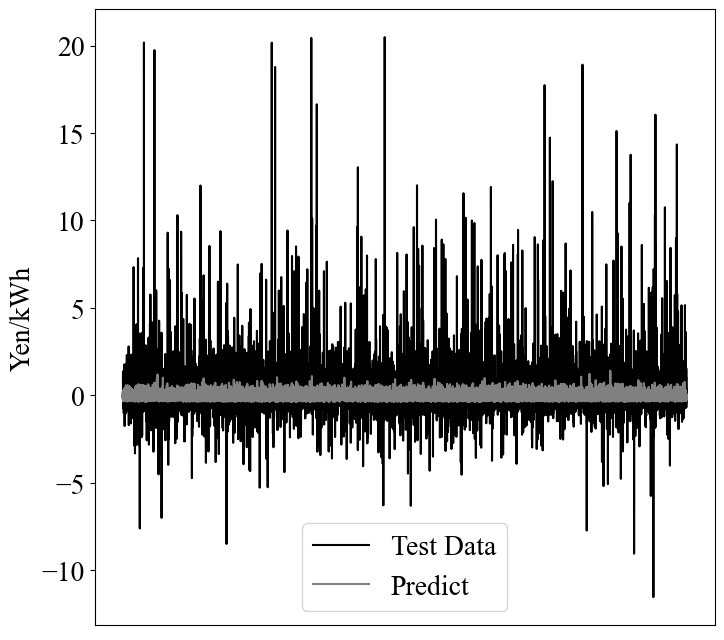

In [15]:
plt.rcParams['font.family']='TImes New Roman'
plt.rcParams['font.size']=20
fig = plt.figure(figsize=(8,8))
ax=plt.subplot()

ax.plot(list(range(len(Y_test))),Y_test,label='Test Data',color='black')
ax.plot(list(range(len(Y_test))),model.predict(X_test),label='Predict',color='gray')

ax.set_xticks([])
plt.legend()
ax.set_ylabel('Yen/kWh')
plt.savefig('../../../卒論関連書類/画像/4章画像_new/重回帰分析/重回帰分析result.png')

In [14]:
Y

array([-0.12370582, -0.05691935, -0.0247629 , ..., -0.0618665 ,
       -0.13112654, -0.05939292])

In [16]:
# df_king['intra_volume（MWh/h）']

In [15]:
# df['intra_volume（MWh/h）']

In [10]:
# 重回帰分析 最小構成
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

target =['太陽光絶対値誤差合算(実績-想定)(kWh)',
        'spot_volume(kWh)', '低下量合計', '風力絶対値誤差合算(実績-想定)(kWh)', '広域予備率平均値(%)']
df_select =df_king[['gap_price[intra-spot](円/kWh)']+target]
df = df_select.dropna()

# 標準化
scaler = StandardScaler()
scaler.fit(np.array(df))
df_std = scaler.transform(np.array(df))
df_std = pd.DataFrame(df_std,columns=df.columns)

# 目的変数(Y)
Y = np.array(df_std['gap_price[intra-spot](円/kWh)'])

# 説明変数(X)
# col_name = ['風力誤差合算(実績-想定)(kWh)(ならし)', '太陽光誤差合算(実績-想定)(kWh)(ならし)', 'spot_volume(kWh)', '低下量合計','広域予備率平均値(%)']
X = np.array(df_std[target])


# データの分割(訓練データとテストデータ)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# モデル構築　
model = LinearRegression()
 
# 学習
model.fit(X_train, Y_train)

# 回帰係数
coef = pd.DataFrame({"col_name":np.array(target),"coefficient":model.coef_}).sort_values(by='coefficient')
 
# 結果
print("【回帰係数】"
# , coef
)
display(coef)
print("【切片】:", model.intercept_)
print("【決定係数(訓練)】:", model.score(X_train, Y_train))
print("【決定係数(テスト)】:", model.score(X_test, Y_test))

【回帰係数】


,col_name,coefficient
2,低下量合計,-0.067975
3,風力絶対値誤差合算(実績-想定)(kWh),0.024017
0,太陽光絶対値誤差合算(実績-想定)(kWh),0.051571
4,広域予備率平均値(%),0.059599
1,spot_volume(kWh),0.202541


【切片】: 0.005323512002293779
【決定係数(訓練)】: 0.057322814215998386
【決定係数(テスト)】: 0.046746839909513005
